In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as graph
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
from numba import jit, cuda
from timeit import default_timer as timer

In [ ]:
# Checking the programme is running in GPU or not
if tf.test.is_gpu_available():
    print("GPU is available and will be used.")
else:
    print("GPU is not available. Check your TensorFlow installation.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU is available and will be used.


In [ ]:
# calling GPU function
strategy = tf.distribute.MirroredStrategy()

In [ ]:
# splitting the data in training and testing part
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()
len(X_train)

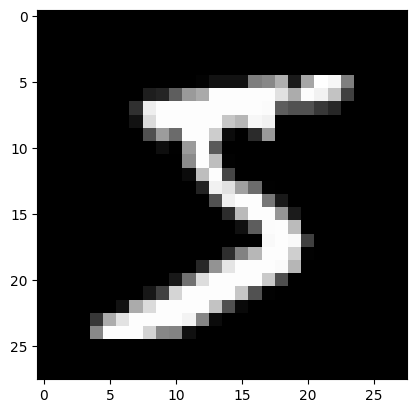

In [ ]:
graph.imshow(X_train[0],cmap = 'gray')

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
with strategy.scope():
  model = Sequential()
  model.add(Flatten(input_shape = (28,28)))
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(10,activation = 'softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(784,1)),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
#   distributed_model = model
#   distributed_model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [ ]:
# Train the model in GPU
import time
start = time.time()
history = model.fit(X_train,Y_train,epochs = 30,validation_split=0.2)
stop = time.time()

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.9175 - val_loss: 0.1604 - val_accuracy: 0.9554
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1290 - accuracy: 0.9622 - val_loss: 0.1171 - val_accuracy: 0.9659
Epoch 3/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.1004 - val_accuracy: 0.9699
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0652 - accuracy: 0.9808 - val_loss: 0.0940 - val_accuracy: 0.9715
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0995 - val_accuracy: 0.9708
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0902 - val_accuracy: 0.9724
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0884 - val_accuracy:

In [ ]:
print(stop-start)

202.73671197891235


In [ ]:
Y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
Y_pred = Y_prob.argmax(axis = 1)

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9755

Text(0, 0.5, 'value of the loss')

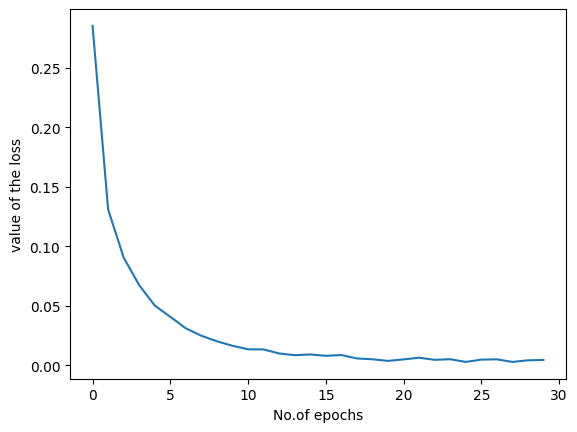

In [ ]:
graph.plot(history.history['loss'])
# graph.plot(history.history['val_loss'])
graph.xlabel('No.of epochs')
graph.ylabel('value of the loss')


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[ 968,    1,    1,    1,    1,    3,    3,    1,    1,    0],
       [   0, 1130,    1,    1,    0,    1,    2,    0,    0,    0],
       [   4,    2,  998,    9,    2,    0,    4,    8,    5,    0],
       [   1,    1,    2,  996,    0,    2,    0,    2,    1,    5],
       [   2,    1,    3,    1,  962,    0,    3,    2,    1,    7],
       [   1,    0,    0,   20,    2,  856,    4,    2,    3,    4],
       [   6,    2,    0,    2,    4,    5,  938,    0,    1,    0],
       [   1,    7,   10,    6,    2,    0,    0,  995,    2,    5],
       [   5,    3,    3,   15,    4,    3,    1,    4,  930,    6],
       [   2,    8,    0,    6,    7,    1,    0,    3,    0,  982]])

In [ ]:
# def plot_roc_curve(true_y, y_prob):
#     """
#     plots the roc curve based of the probabilities
#     """

#     fpr, tpr, thresholds = roc_curve(true_y, y_prob)
#     plt.plot(fpr, tpr)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
# plot_roc_curve(Y_test, Y_pred)

In [ ]:
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([6])

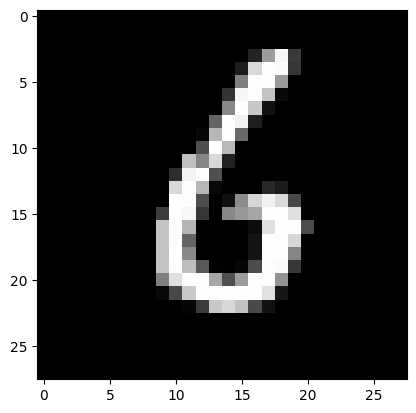

In [ ]:
graph.imshow(X_test[50],cmap = 'gray')

546 768 3


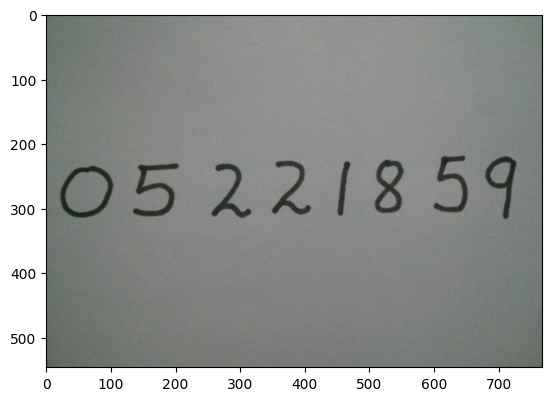

In [ ]:
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
graph.imshow(img)
h,w,c = img.shape
print(h,w,c)

if w>1000:
  new_w = 1000
  ar = w/h
  new_h = int(new_w/ar)
  img = cv2.resize(img,(new_w,new_h),interpolation = cv2.INTER_AREA)
graph.imshow(img)

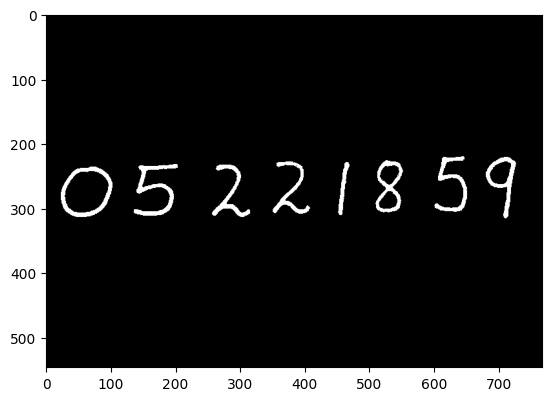

In [ ]:

def thresholding(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret,thresh = cv2.threshold(img_gray,60,255,cv2.THRESH_BINARY_INV)
  graph.imshow(thresh, cmap = 'gray')
  return thresh
thresh_img = thresholding(img)

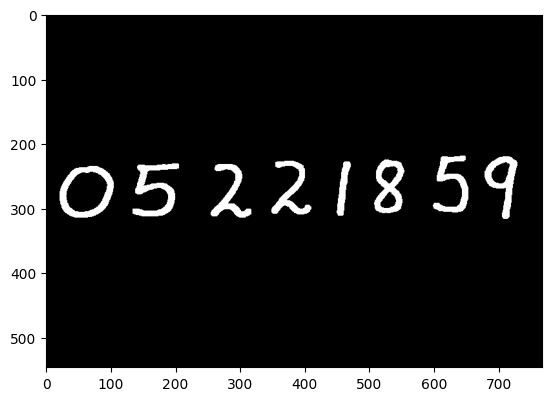

In [ ]:
kernel = np.ones((3,5),np.uint8)
dilated = cv2.dilate(thresh_img,kernel,iterations = 1)
graph.imshow(dilated,cmap = 'gray')

In [ ]:
(contours, hiererchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contours_letters = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[0])
# cv2.boundingRect(contours[0])[1]

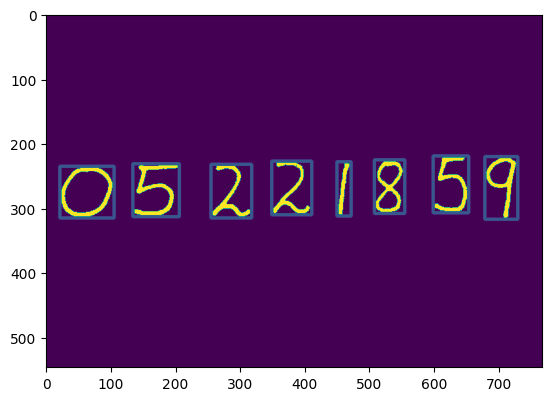

In [ ]:
img2 = thresh_img.copy()
letter_list  = []
for ctr in sorted_contours_letters:
  # t = cv2.boundingRect(ctr)[1]
  # print(ctr)
  x,y,w,h = cv2.boundingRect(ctr)
  # print(x,y,w,h)
  letter_list.append([x,y,x+w,y+h])
  cv2.rectangle(img2,(x,y),(x+w,y+h),(70,100,250),3)
graph.imshow(img2)

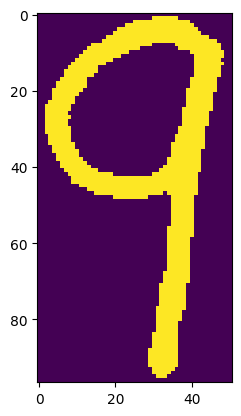

In [ ]:
for i in range(8):
  x = letter_list[i]
  y = thresh_img[x[1]:x[3],x[0]:x[2]]
  cv2.imwrite(f'new{i}.png',y)
  graph.imshow(y)

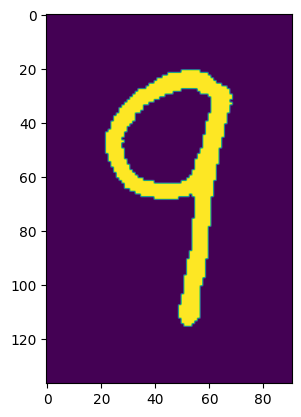

In [ ]:
x = []
for j in range(8):
  p = cv2.imread(f'new{j}.png',0)
  a = np.zeros(len(p[0]),dtype = int)
  c = [a]*20
  for i in p:
    c.append(i)
  for i in range(20):
    c.append(a)
  c = np.array(c)
  c = np.transpose(c)
  b = np.zeros(len(c[0]),dtype = int)
  d = [b]*20
  for i in c:
    d.append(i)
  for i in range(20):
    d.append(b)
  d = np.array(d)
  d = np.transpose(d)

  # print(c)
  graph.imshow(d)
  cv2.imwrite(f'new1{j}.png',d)

In [ ]:
for i in range(8):
  img = Image.open(f'new1{i}.png')
  img = img.resize((28,28))
  # img = cv2.imread(img,0)
  img.save(f'new2{i}.png')
t = []
for i in range(8):
  img = cv2.imread(f'new2{i}.png',0)
  x = model.predict(img.reshape(1,28,28)).argmax(axis=1)
  t.append(x)


1/1 [==============================] - 0s 18ms/step


In [ ]:
t

[array([0]),
 array([5]),
 array([2]),
 array([2]),
 array([1]),
 array([8]),
 array([5]),
 array([9])]